In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import json
plt.style.use('fivethirtyeight')

In [174]:
import warnings
warnings.filterwarnings("ignore")

In [175]:
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [176]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [177]:
##Aggregating login counts based on 15-minute intervals
logins.set_index('login_time',inplace=True)
logins['count']=1
logins=logins.resample('15T').sum()
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


(array([719171., 719185., 719199., 719213., 719227., 719241., 719255.,
        719269.]), <a list of 8 Text xticklabel objects>)

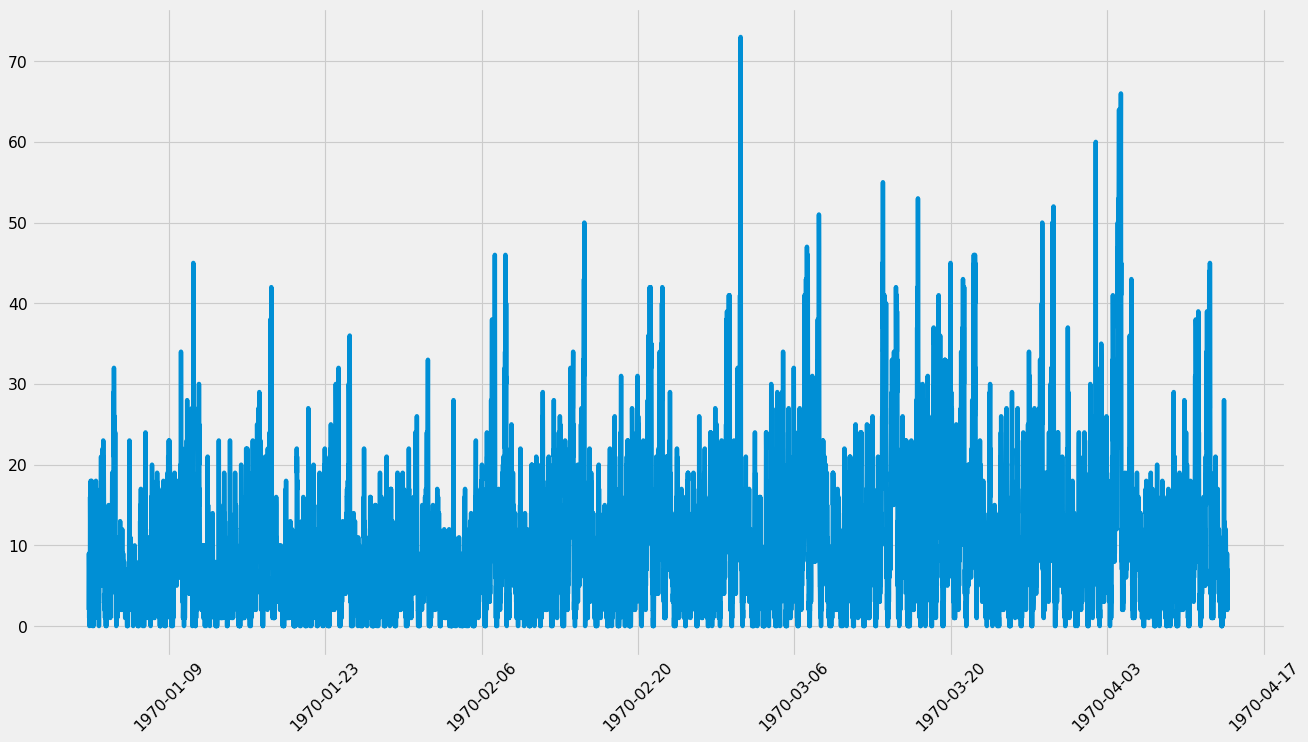

In [178]:
##Preliminary plotting of the data
plt.figure(figsize=(18,10), dpi= 80)
plt.plot(logins)
plt.xticks(rotation=45)

In [179]:
jan=logins['1970-01-01': '1970-01-31']
jan.reset_index(drop=False, inplace=True)
feb=logins['1970-02-01': '1970-02-28']
feb.reset_index(drop=False, inplace=True)
mar=logins['1970-03-01': '1970-03-31']
mar.reset_index(drop=False, inplace=True)
apr=logins['1970-04-01': '1970-04-30']
apr.reset_index(drop=False, inplace=True)

In [180]:
plt.figure(figsize=(18,10), dpi= 80)
plt.plot(jan)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B5F62C19D8> (for post_execute):


ValueError: view limit minimum -35959.69947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35959.69947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x800 with 1 Axes>

In [181]:
plt.figure(figsize=(18,10), dpi= 80)
plt.plot(feb)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text xticklabel objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B5F62C19D8> (for post_execute):


ValueError: view limit minimum -35961.09947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35961.09947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x800 with 1 Axes>

In [182]:
plt.figure(figsize=(18,10), dpi= 80)
plt.plot(mar)
plt.xticks(rotation=45)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B5F62C19D8> (for post_execute):


ValueError: view limit minimum -35962.64947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35962.64947916667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x800 with 1 Axes>

In [183]:
plt.figure(figsize=(18,10), dpi= 80)
plt.plot(apr)
plt.xticks(rotation=45)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 9 Text xticklabel objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B5F62C19D8> (for post_execute):


ValueError: view limit minimum -35963.2890625 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -35963.2890625 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1440x800 with 1 Axes>

In [184]:
#looking for in-depth into each month
jan['weekday'] = pd.to_datetime(jan['login_time']).apply(lambda x: x.weekday())
feb['weekday'] = pd.to_datetime(feb['login_time']).apply(lambda x: x.weekday())
mar['weekday'] = pd.to_datetime(mar['login_time']).apply(lambda x: x.weekday())
apr['weekday'] = pd.to_datetime(apr['login_time']).apply(lambda x: x.weekday())

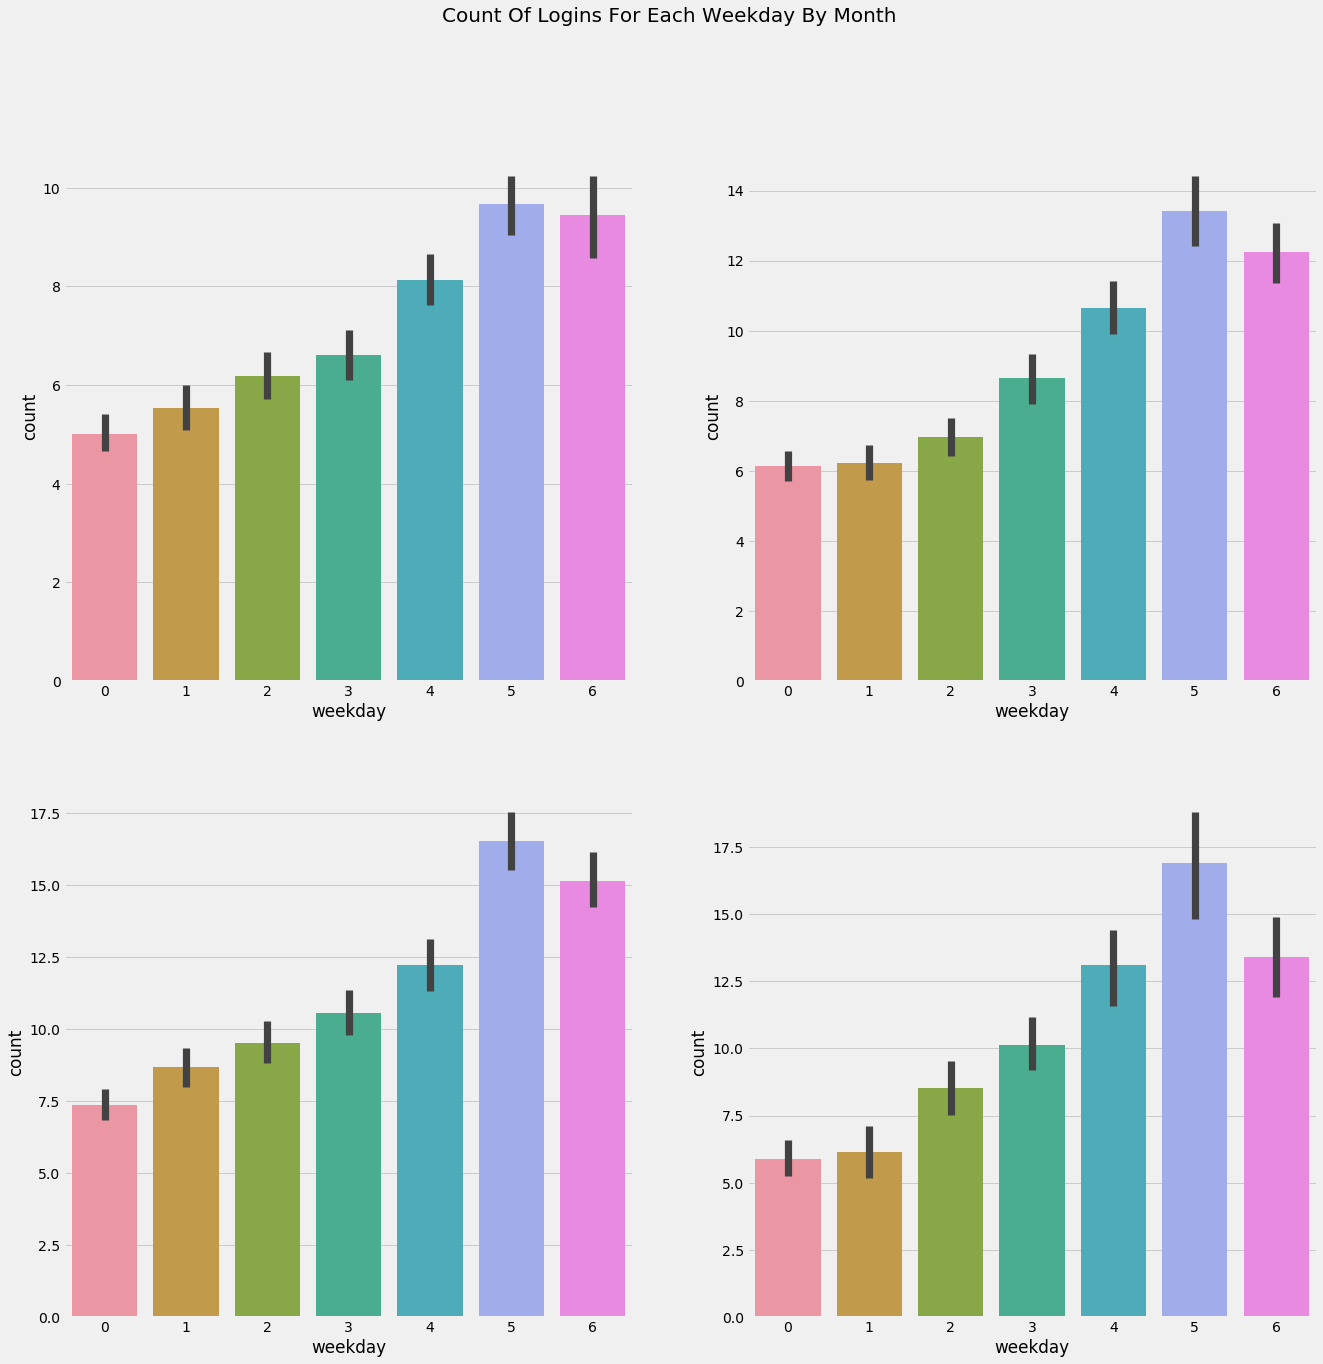

In [185]:
##Comparing the frequency of logins by specific days of the week per month
fig,ax = plt.subplots(2,2, figsize=(20,20))               
plt.suptitle("Count Of Logins For Each Weekday By Month", fontsize=20)
sns.barplot(x='weekday', y='count', data=jan, ax = ax[0,0])
sns.barplot(x='weekday', y='count', data=feb, ax = ax[0,1])
sns.barplot(x='weekday', y='count', data=mar, ax = ax[1,0])
sns.barplot(x='weekday', y='count', data=apr, ax = ax[1,1])

The line graphs suggest that certain times exhibit increased activity. It seems that there is increased activity during the 
weekends (fri-sun) with the most activity on saturdays. The month of April also shows a greater count of logins than the other
months.

## Part 2

Two important factors to watch over to consider this experiment a success would be the number of drivers in both cities at subsequent times and the total revenue being made during the days of the week.  The ideal situation would be to have 50% of the drivers available to be in Gotham and the other 50% of available drivers be in Metropolis during the weekends. The purpose of this experiment would serve to identify the distribution of drivers to maximize revenue. 
The experiment would most likely span several days and each weekday, a different distribution of drivers would be dispersed throughout both cities and after several days, we could produce plots and graphs to see if the revenue peaks at a certain distribution. I would hypothesize that distributing 70% of drivers throughout Metropolis (the more day-active city) and the other 30% of drivers throughout Gotham (the more night-active city) during the hours of daytime and then distributing the inverse during nighttime would produce the highest revenue. 
After tinkering with the percent distribution of drivers over a period of time and retrieving data on the amount of passengers per day, time spent working, time spent idling, revenue per day, etc, the data would be grouped by the percent spread of drivers for that day. Then, an oneway anova would be used to compare the means of the groups and using the analysis along with visual representations to show the trends and correlations, a decision could be made.

## Part 3

In [186]:
file=open('ultimate_data_challenge.json', 'r')
ult=pd.DataFrame(json.load(file))
file.close()
ult

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [187]:
ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [188]:
ult.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [189]:
ult['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [190]:
## replacing NaN values
avg_by=ult['avg_rating_by_driver'].mean()
ult['avg_rating_by_driver'].fillna(avg_by, inplace=True)

avg_of=ult['avg_rating_of_driver'].mean()
ult['avg_rating_of_driver'].fillna(avg_of, inplace=True)

ult['phone'].fillna('iPhone', inplace = True)

In [191]:
ult.sort_values(by='last_trip_date')

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
31425,4.31,5.0,4.601559,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
10729,19.67,5.0,3.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
40336,5.98,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
34828,2.45,5.0,5.000000,1.25,Astapor,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
37295,0.77,5.0,3.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
9941,1.61,5.0,4.601559,2.00,Winterfell,2014-01-01,Android,2014-01-01,100.0,1,False,100.0
13542,3.08,5.0,4.601559,1.50,Winterfell,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0
39857,9.97,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
19976,4.74,5.0,5.000000,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,False,100.0
48271,8.05,5.0,4.601559,1.00,Winterfell,2014-01-01,iPhone,2014-01-01,0.0,1,True,100.0


In [192]:
ult['retained'] = np.where(ult['last_trip_date'] >= '2014-06-01', 1, 0)
ult

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


In [193]:
print(ult['retained'].sum()/len(ult) *100, 'percent of users who signed up after January 2014 are retained')

37.608000000000004 percent of users who signed up after January 2014 are retained


In [194]:
## Preparing data for predictive modeling
ult=ult.drop(['last_trip_date','signup_date'],axis=1)
ult

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.700000,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.000000,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.300000,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.600000,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.400000,1.19,Winterfell,Android,11.8,14,False,82.4,0
5,10.56,5.0,3.500000,1.00,Winterfell,iPhone,0.0,2,True,100.0,1
6,3.95,4.0,4.601559,1.00,Astapor,Android,0.0,1,False,100.0,0
7,2.04,5.0,5.000000,1.00,Winterfell,iPhone,0.0,2,False,100.0,0
8,4.36,5.0,4.500000,1.00,Winterfell,Android,0.0,2,False,100.0,0
9,2.37,5.0,4.601559,1.00,Winterfell,Android,0.0,1,False,0.0,0


In [195]:
ult_model=pd.get_dummies(ult, columns = ['city', 'phone', 'ultimate_black_user'])

In [196]:
target = ult_model['retained']
variables = ult_model
variables.drop('retained', axis = 1, inplace = True)

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size=0.25, random_state=0)

In [197]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


predictions = logisticRegr.predict(x_test)

In [198]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.71872


In [199]:
## using random forests to see which variables are most important
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf.fit(x_train, y_train);

In [200]:
feature_list = list(ult_model.columns)

In [201]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_dist             Importance: 0.3
Variable: avg_rating_by_driver Importance: 0.18
Variable: weekday_pct          Importance: 0.12
Variable: avg_rating_of_driver Importance: 0.08
Variable: trips_in_first_30_days Importance: 0.07
Variable: surge_pct            Importance: 0.06
Variable: city_King's Landing  Importance: 0.06
Variable: avg_surge            Importance: 0.04
Variable: phone_Android        Importance: 0.02
Variable: phone_iPhone         Importance: 0.02
Variable: city_Astapor         Importance: 0.01
Variable: city_Winterfell      Importance: 0.01
Variable: ultimate_black_user_False Importance: 0.01
Variable: ultimate_black_user_True Importance: 0.01


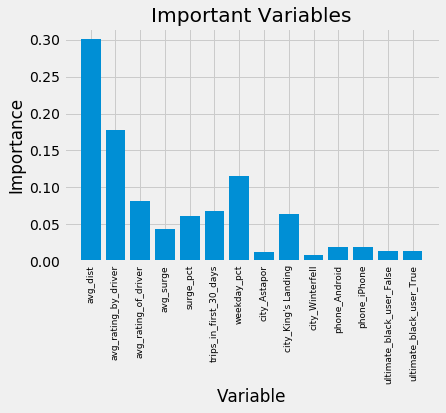

In [203]:
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Important Variables'); 
plt.tick_params(axis='x', which='major', labelsize=9)

The logistic regression model showed a score of 72%. The three most important variables in user rentention were the average distance, average rating by driver, and weekday percentrage. Ultimate may want to focus on those variables to increase retention of users. Another interesting finding is that of the three cities, Winterfell had a substantially larger importance score than the other two cities so it may be worth looking into what is different about Winterfell than the other two cities.